In [154]:
import pandas as pd
import numpy as np
import matplotlib as mlp
from matplotlib import pyplot as plt

In [2]:
fname = 'lumiEach.csv'
df = pd.read_csv(fname, delimiter=' ')

In [17]:
df.head()

,path,period,lumi
0,HLT_Mu7_IP4,A,0.000
1,HLT_Mu7_IP4,B,0.365
2,HLT_Mu7_IP4,C,0.157
3,HLT_Mu7_IP4,D,6.417
4,HLT_Mu7_IP4,sum,6.939


In [136]:
pivoted_df = df.pivot(columns="period", index='path')
pivoted_df.columns

MultiIndex([('lumi',   'A'),
            ('lumi',   'B'),
            ('lumi',   'C'),
            ('lumi',   'D'),
            ('lumi', 'sum')],
           names=[None, 'period'])

In [137]:
my_index = pd.Index(data=[
  'HLT_Mu7_IP4',
  'HLT_Mu8_IP3',
  'HLT_Mu8p5_IP3p5',
  'HLT_Mu8_IP5',
  'HLT_Mu8_IP6',
  'HLT_Mu9_IP4',
  'HLT_Mu9_IP5',
  'HLT_Mu9_IP6',
  'HLT_Mu10p5_IP3p5', 
  'HLT_Mu12_IP6'])

flat_df = pd.DataFrame( { 
                         'A' : pivoted_df[('lumi',   'A')],
                         'B' : pivoted_df[('lumi',   'B')],
                         'C' : pivoted_df[('lumi',   'C')],
                         'D' : pivoted_df[('lumi',   'D')],
                         'sum': pivoted_df[('lumi',   'sum')],
                        },
                         index=my_index)
flat_df



,A,B,C,D,sum
HLT_Mu7_IP4,0.000,0.365,0.157,6.417,6.939
HLT_Mu8_IP3,0.442,0.718,0.017,0.406,1.582
HLT_Mu8p5_IP3p5,0.320,0.000,0.000,0.000,0.320
HLT_Mu8_IP5,0.000,0.000,0.006,8.253,8.259
HLT_Mu8_IP6,0.000,0.000,0.006,8.253,8.259
HLT_Mu9_IP4,0.000,0.000,0.006,0.004,0.009
HLT_Mu9_IP5,0.000,1.367,2.698,16.825,20.890
HLT_Mu9_IP6,4.642,4.323,3.838,20.774,33.576
HLT_Mu10p5_IP3p5,0.320,0.000,0.000,0.000,0.320
HLT_Mu12_IP6,0.000,2.673,5.515,26.510,34.698


In [138]:
#### NOT REALLY USEFUL .... 
# scale by total lumi in period A,B,C,D
lumi = pd.Series({
'A': 4.642,
'C': 5.515,
'B': 4.932,
'D': 26.510,
'sum': 41.599
})
lumi

#norm_flat_df = flat_df.div(lumi)

A       4.642
C       5.515
B       4.932
D      26.510
sum    41.599
dtype: float64

In [143]:
norm_flat_df = flat_df

In [172]:
sum_norm_flat_df = norm_flat_df/norm_flat_df.sum()
sum_norm_flat_df

,A,B,C,D,sum
HLT_Mu7_IP4,0.000000,0.038641,0.012824,0.073386,0.060417
HLT_Mu8_IP3,0.077219,0.076011,0.001389,0.004643,0.013774
HLT_Mu8p5_IP3p5,0.055905,0.000000,0.000000,0.000000,0.002786
HLT_Mu8_IP5,0.000000,0.000000,0.000490,0.094383,0.071910
HLT_Mu8_IP6,0.000000,0.000000,0.000490,0.094383,0.071910
HLT_Mu9_IP4,0.000000,0.000000,0.000490,0.000046,0.000078
HLT_Mu9_IP5,0.000000,0.144717,0.220371,0.192413,0.181886
HLT_Mu9_IP6,0.810971,0.457654,0.313485,0.237575,0.292341
HLT_Mu10p5_IP3p5,0.055905,0.000000,0.000000,0.000000,0.002786
HLT_Mu12_IP6,0.000000,0.282977,0.450461,0.303172,0.302111


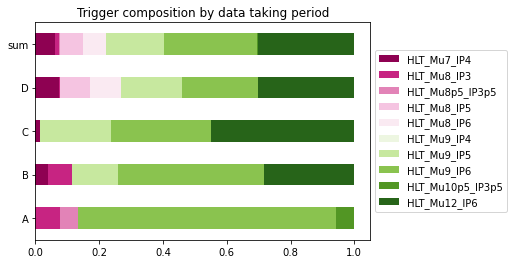

In [189]:
ax = sum_norm_flat_df.T.plot.barh(stacked=True, colormap='PiYG')
lgd = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_title('Trigger composition by data taking period')
ax.figure.savefig('triggerComposition.png',bbox_extra_artists=(lgd,), bbox_inches='tight')
ax.figure.savefig('triggerComposition.pdf',bbox_extra_artists=(lgd,), bbox_inches='tight')